The order is: 4*x+15
Predicted Theta by minimizing MSE(Mean Square Error):
 [[16.46504722]
 [ 3.97162837]]
Linear Regression Model Coef:
 [[3.97162837]] [16.46504722]
The score is:  0.9748747410697661


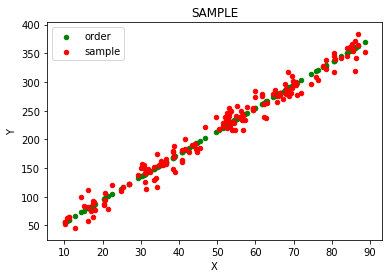

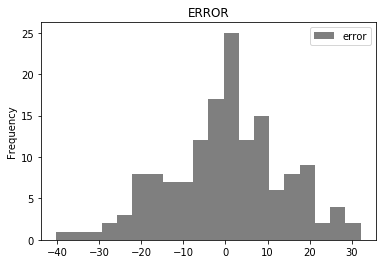

In [105]:
#imports and prepares
import numpy as np
import matplotlib.pyplot as plt
# magic command
%matplotlib inline
plt.close('all')
import pandas as pd
import sklearn.linear_model

# size of sample
n = 150

# to save randomizer
# np.random.seed(33)
a=10
b=90
# linear sample on [a;b]
x = a+np.random.rand(n)*(b-a)
k = 4
b= 15
print("The order is: "+str(k)+"*x+"+str(b))
y = k*x+b
df = pd.DataFrame(data = {'Y':y,'X':x}, columns = ['Y','X'])
lin_x = df.plot.scatter(x='X',y='Y',title = "ORDER",color = "green",label = "order")

mu = 0
sigma = 15
# error belongs to N(mu,sigma^2)
error =mu+sigma*np.random.randn(n)
# show error distribution in hist
de = pd.DataFrame({'error':error},columns=['error'])
de.plot.hist(alpha= 0.5,bins =20,color = 'k',title = "ERROR")

# linear sample with error
z=y+error
dfn = pd.DataFrame(data = {'Y':z,'X':x}, columns = ['Y','X'])
dfn.plot.scatter(x='X',y='Y',title = "SAMPLE",color = "red",label = "sample", ax = lin_x)

# theta_predict = (X^T*X)^(-1)*X^T*Y
X = np.array(x).reshape((n,1))
Y = np.array(z).reshape((n,1))
Xb = np.c_[np.ones((n,1)),X]
theta = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(Y)
print("Predicted Theta by minimizing MSE(Mean Square Error):\n",theta)

# linear model
model = sklearn.linear_model.LinearRegression()
# train the model
model.fit(X, Y)

print("Linear Regression Model Coef:\n",model.coef_,model.intercept_)
print("The score is: ",model.score(X,Y))